In [ ]:
 # Importing Libraries
!pip install sklearn
import pandas as pd
import networkx as nx
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pgmpy
from pgmpy.models import BayesianNetwork
from IPython.display import Image, display
from pgmpy.estimators import HillClimbSearch, BicScore, PC, K2Score
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=e29b7a331f9d190dbbba9f308020978629b89071b9df1379475fab398b930630
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.8 MB/s 


In [ ]:
# Loading data into local variable
df = pd.read_csv('Database.csv',encoding = 'utf-8')
df

,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,...,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,no,no,no,no or occasionally,no,no,no
1,19,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,regularly,occasionally to regularly,occasionally,no or occasionally,no,no,no
2,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,yes,no,no,occasionally,no or occasionally,no,no,no
3,19,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,no,no,occasionally,no or occasionally,no,no,no
4,18,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,no,no,no,no or occasionally,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,19,male,yes,humanities,first,no,no,yes,yes,yes,...,no,no,no,no,no,occasionally,no or occasionally,no,no,no
4180,18,male,yes,humanities,first,no,no,no,yes,yes,...,no,no,no,no,no,no,no or occasionally,no,no,no
4181,19,female,yes,humanities,first,no,no,yes,yes,yes,...,no,no,no,no,no,occasionally,no or occasionally,no,no,no
4182,20 and more,male,yes,humanities,first,no,no,no,no,no,...,no,no,no,no,no,occasionally,no or occasionally,no,yes,no


Categorizing

In [ ]:

hj=dict(df['Weight (kg)'])
index = list(hj.keys())
for i in range(len(df['Weight (kg)'])):
  if(df['Weight (kg)'][index[i]]>=38 and df['Weight (kg)'][index[i]]<=52):
    df['Weight (kg)'][index[i]]=1;
  elif(df['Weight (kg)'][index[i]]>=53 and df['Weight (kg)'][index[i]]<=67):
    df['Weight (kg)'][index[i]]=2;
  elif(df['Weight (kg)'][index[i]]>=68 and df['Weight (kg)'][index[i]]<=82):
    df['Weight (kg)'][index[i]]=3;
  elif(df['Weight (kg)'][index[i]]>=83 and df['Weight (kg)'][index[i]]<=97):
    df['Weight (kg)'][index[i]]=4;
  elif(df['Weight (kg)'][index[i]]>=98 and df['Weight (kg)'][index[i]]<=112):
    df['Weight (kg)'][index[i]]=5;
  elif(df['Weight (kg)'][index[i]]>=113 and df['Weight (kg)'][index[i]]<=127):
    df['Weight (kg)'][index[i]]=6;
  elif(df['Weight (kg)'][index[i]]>=128 and df['Weight (kg)'][index[i]]<=142):
    df['Weight (kg)'][index[i]]=7;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-package

In [ ]:
hj=dict(df['Systolic blood pressure (mmHg)'])
index = list(hj.keys())
for i in range(len(df['Systolic blood pressure (mmHg)'])):
  if(df['Systolic blood pressure (mmHg)'][index[i]]>=8 and df['Systolic blood pressure (mmHg)'][index[i]]<=11):
    df['Systolic blood pressure (mmHg)'][index[i]]=1;
  elif(df['Systolic blood pressure (mmHg)'][index[i]]>11 and df['Systolic blood pressure (mmHg)'][index[i]]<=14):
    df['Systolic blood pressure (mmHg)'][index[i]]=2;
  elif(df['Systolic blood pressure (mmHg)'][index[i]]>14 and df['Systolic blood pressure (mmHg)'][index[i]]<=17):
    df['Systolic blood pressure (mmHg)'][index[i]]=3;


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
hj=dict(df['Diastolic blood pressure (mmHg)'])
index = list(hj.keys())
for i in range(len(df['Diastolic blood pressure (mmHg)'])):
  if(df['Diastolic blood pressure (mmHg)'][index[i]]>=4 and df['Diastolic blood pressure (mmHg)'][index[i]]<7):
    df['Diastolic blood pressure (mmHg)'][index[i]]=1;
  elif(df['Diastolic blood pressure (mmHg)'][index[i]]>=7 and df['Diastolic blood pressure (mmHg)'][index[i]]<10):
    df['Diastolic blood pressure (mmHg)'][index[i]]=2;
  elif(df['Diastolic blood pressure (mmHg)'][index[i]]>=10 and df['Diastolic blood pressure (mmHg)'][index[i]]<=13):
    df['Diastolic blood pressure (mmHg)'][index[i]]=3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
hj=dict(df['Heart rate (bpm)'])
index = list(hj.keys())
for i in range(len(df['Heart rate (bpm)'])):
  if(df['Heart rate (bpm)'][index[i]]>=40 and df['Heart rate (bpm)'][index[i]]<=54):
    df['Heart rate (bpm)'][index[i]]=1;
  elif(df['Heart rate (bpm)'][index[i]]>=55 and df['Heart rate (bpm)'][index[i]]<=69):
    df['Heart rate (bpm)'][index[i]]=2;
  elif(df['Heart rate (bpm)'][index[i]]>=70 and df['Heart rate (bpm)'][index[i]]<=84):
    df['Heart rate (bpm)'][index[i]]=3;
  elif(df['Heart rate (bpm)'][index[i]]>=85 and df['Heart rate (bpm)'][index[i]]<=99):
    df['Heart rate (bpm)'][index[i]]=4;
  elif(df['Heart rate (bpm)'][index[i]]>=100 and df['Heart rate (bpm)'][index[i]]<=114):
    df['Heart rate (bpm)'][index[i]]=5;
  elif(df['Heart rate (bpm)'][index[i]]>=115 and df['Heart rate (bpm)'][index[i]]<=129):
    df['Heart rate (bpm)'][index[i]]=6;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib

In [ ]:
hj=dict(df['Height (cm)'])
index = list(hj.keys())
for i in range(len(df['Height (cm)'])):
  if(df['Height (cm)'][index[i]]>=146 and df['Height (cm)'][index[i]]<=155):
    df['Height (cm)'][index[i]]=1;
  elif(df['Height (cm)'][index[i]]>=156 and df['Height (cm)'][index[i]]<=165):
    df['Height (cm)'][index[i]]=2;
  elif(df['Height (cm)'][index[i]]>=166 and df['Height (cm)'][index[i]]<=175):
    df['Height (cm)'][index[i]]=3;
  elif(df['Height (cm)'][index[i]]>=176 and df['Height (cm)'][index[i]]<=185):
    df['Height (cm)'][index[i]]=4;
  elif(df['Height (cm)'][index[i]]>=186 and df['Height (cm)'][index[i]]<=195):
    df['Height (cm)'][index[i]]=5;
  elif(df['Height (cm)'][index[i]]>=196 and df['Height (cm)'][index[i]]<=205):
    df['Height (cm)'][index[i]]=6;


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launc

Learning

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
for col in df.columns:
  df[col]=lbl.fit_transform(df[[col]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Corr Matrix and heat map plotting

In [ ]:
df.corr()

,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,...,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
Age (4 levels),1.000000,0.008106,-0.137513,-0.053354,0.241326,-0.001197,-0.012484,-0.018989,-0.046836,0.110381,...,0.011026,0.006278,-0.002241,0.076605,0.079580,0.014444,-0.011899,-0.006280,0.095216,0.048898
Gender,0.008106,1.000000,-0.001429,0.211125,0.031076,0.014446,-0.008698,-0.023907,-0.002232,0.031047,...,-0.096700,-0.049385,-0.011286,0.016288,0.021677,0.118805,0.043704,0.130299,0.056900,0.012567
French nationality,-0.137513,-0.001429,1.000000,0.009479,-0.031544,-0.051582,-0.044415,0.007284,0.009840,0.002260,...,-0.036551,-0.006342,-0.031463,0.002794,0.000423,0.084452,0.009796,0.036851,-0.013247,-0.015709
Field of study,-0.053354,0.211125,0.009479,1.000000,0.018271,0.004006,-0.009259,-0.036359,-0.009635,0.031147,...,-0.056903,0.000746,-0.005329,0.020186,0.024001,0.057985,0.052159,0.052943,0.044658,0.051979
Year of university,0.241326,0.031076,-0.031544,0.018271,1.000000,-0.012347,-0.030748,-0.123246,-0.163584,0.212283,...,-0.018387,-0.000758,-0.034374,0.112076,0.122181,0.088865,-0.013324,0.015353,0.123430,0.071595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Drinker (3 levels),0.014444,0.118805,0.084452,0.057985,0.088865,-0.008370,-0.041298,-0.143804,-0.107165,0.138351,...,-0.050317,-0.017066,-0.065060,0.253239,0.264615,1.000000,0.298292,0.190945,0.269030,0.044159
Drinker (2 levels),-0.011899,0.043704,0.009796,0.052159,-0.013324,0.048189,0.017119,-0.031785,-0.012398,-0.011870,...,-0.017238,-0.008852,0.003490,-0.031331,-0.027750,0.298292,1.000000,0.165416,0.010285,-0.040575
Binge drinking,-0.006280,0.130299,0.036851,0.052943,0.015353,0.030361,0.011012,0.001462,-0.009255,-0.033855,...,-0.010391,-0.022226,-0.006835,-0.007186,-0.019661,0.190945,0.165416,1.000000,0.004822,0.055024
Marijuana use,0.095216,0.056900,-0.013247,0.044658,0.123430,0.003494,-0.014700,-0.290013,-0.362903,0.401509,...,0.001919,-0.001323,-0.036635,0.493962,0.527488,0.269030,0.010285,0.004822,1.000000,0.475871


In [ ]:
df

,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,...,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,2,0,1,0,1,0,0,1,1,1,...,0,0,0,2,1,0,0,0,0,0
1,1,0,1,0,1,0,0,1,1,1,...,0,0,0,4,2,1,0,0,0,0
2,2,0,1,0,1,0,0,1,1,1,...,0,0,1,2,1,1,0,0,0,0
3,1,0,1,0,1,0,0,1,1,1,...,0,0,0,2,1,1,0,0,0,0
4,0,0,1,0,1,0,0,1,1,1,...,0,0,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,1,1,1,0,0,0,0,1,1,1,...,0,0,0,2,1,1,0,0,0,0
4180,0,1,1,0,0,0,0,0,1,1,...,0,0,0,2,1,0,0,0,0,0
4181,1,0,1,0,0,0,0,1,1,1,...,0,0,0,2,1,1,0,0,0,0
4182,2,1,1,0,0,0,0,0,0,0,...,0,0,0,2,1,1,0,0,1,0


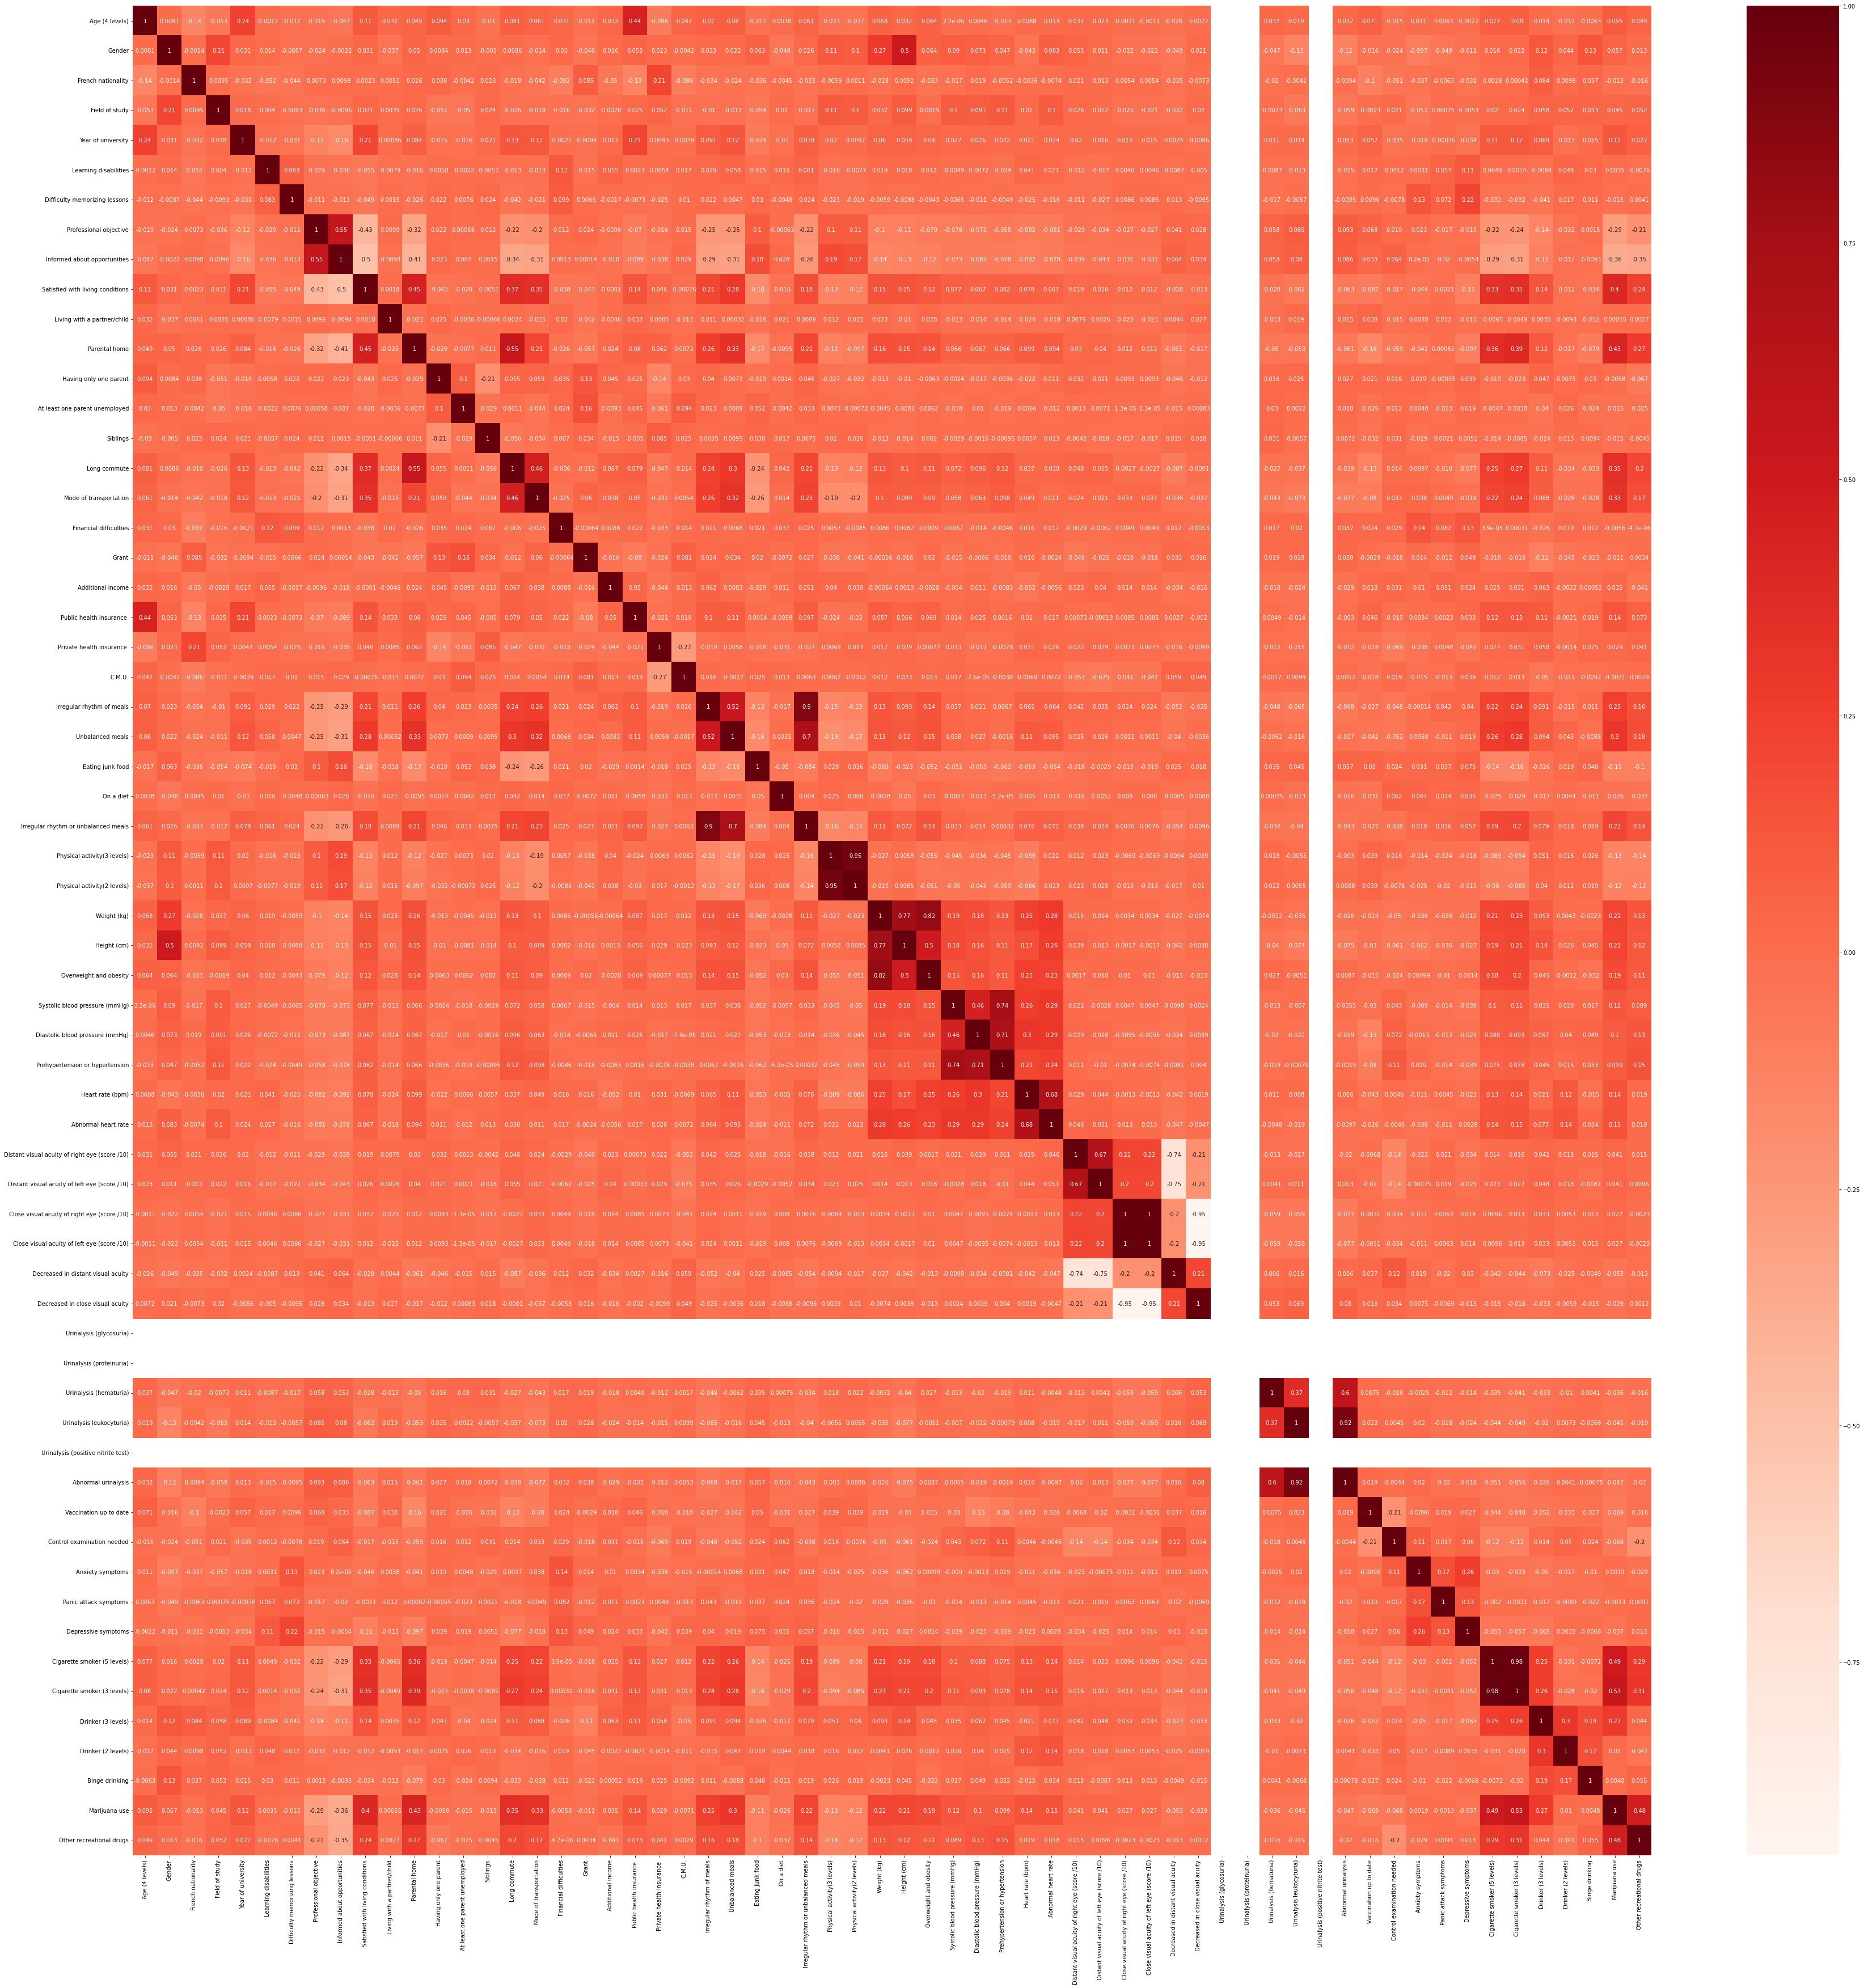

In [ ]:
 #Plot a heatmap
fig = plt.figure(figsize = (60,60))
dataplot = sns.heatmap(df.corr(), cmap = "Reds", annot = True)
plt.show()

Drop NA Values

In [ ]:
# drop rows with null values.

df.dropna(inplace = True)
df.shape

(4184, 62)

Drop this coolumns

In [ ]:
df.drop(['Urinalysis (proteinuria)','Urinalysis (positive nitrite test)','Urinalysis (glycosuria)','Cigarette smoker (3 levels)','Drinker (2 levels)','Physical activity(2 levels)'],axis=1,inplace=True)

In [ ]:
df

,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,...,Vaccination up to date,Control examination needed,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Drinker (3 levels),Binge drinking,Marijuana use,Other recreational drugs
0,2,0,1,0,1,0,0,1,1,1,...,2,1,0,0,0,2,0,0,0,0
1,1,0,1,0,1,0,0,1,1,1,...,2,0,0,0,0,4,1,0,0,0
2,2,0,1,0,1,0,0,1,1,1,...,2,0,0,0,1,2,1,0,0,0
3,1,0,1,0,1,0,0,1,1,1,...,2,0,0,0,0,2,1,0,0,0
4,0,0,1,0,1,0,0,1,1,1,...,1,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,1,1,1,0,0,0,0,1,1,1,...,1,0,0,0,0,2,1,0,0,0
4180,0,1,1,0,0,0,0,0,1,1,...,1,0,0,0,0,2,0,0,0,0
4181,1,0,1,0,0,0,0,1,1,1,...,1,0,0,0,0,2,1,0,0,0
4182,2,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,2,1,0,1,0


Creating Bayesian network.

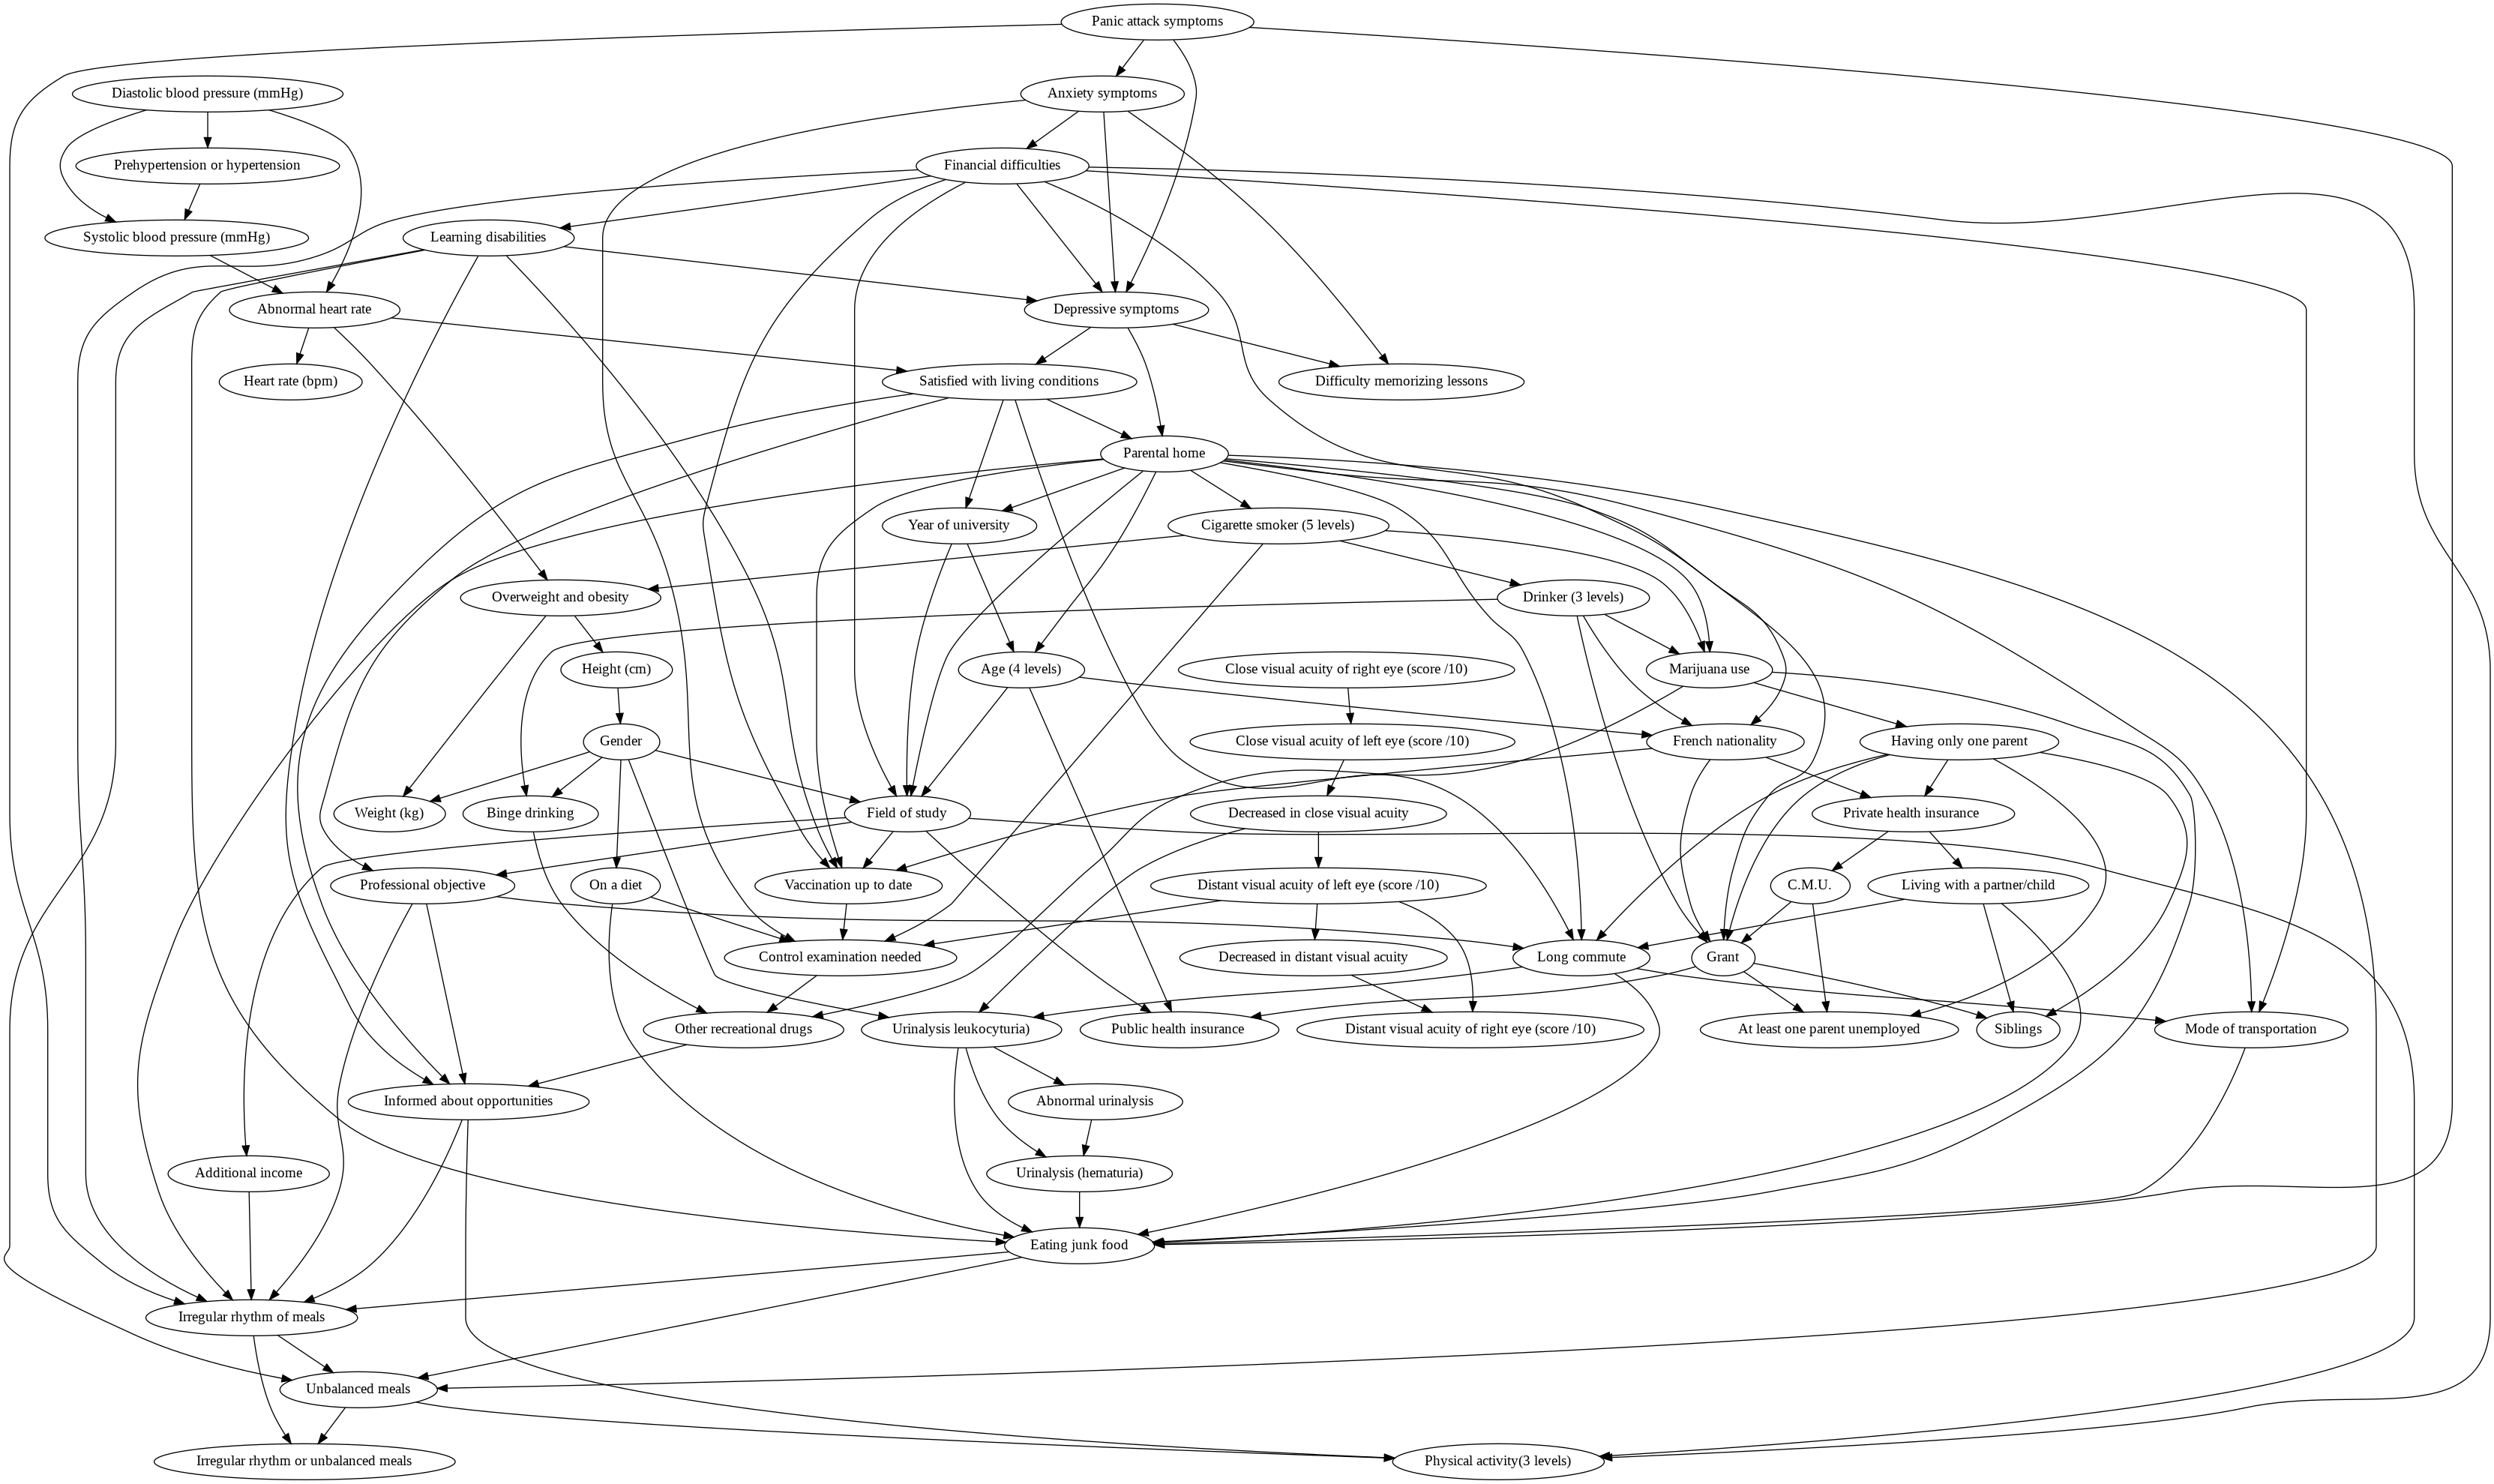

In [ ]:
model = BayesianNetwork()
model.add_edges_from([('Age (4 levels)', 'Public health insurance '),
 ('Age (4 levels)', 'Field of study'),
 ('Age (4 levels)', 'French nationality'),
 ('Gender', 'Weight (kg)'),
 ('Gender', 'Field of study'),
 ('Gender', 'Urinalysis leukocyturia)'),
 ('Gender', 'Binge drinking'),
 ('Gender', 'On a diet'),
 ('French nationality', 'Vaccination up to date'),
 ('French nationality', 'Private health insurance '),
 ('French nationality', 'Grant'),
 ('Field of study', 'Physical activity(3 levels)'),
 ('Field of study', 'Public health insurance '),
 ('Field of study', 'Professional objective'),
 ('Field of study', 'Vaccination up to date'),
 ('Field of study', 'Additional income'),
 ('Year of university', 'Age (4 levels)'),
 ('Year of university', 'Field of study'),
 ('Learning disabilities', 'Depressive symptoms'),
 ('Learning disabilities', 'Unbalanced meals'),
 ('Learning disabilities', 'Vaccination up to date'),
 ('Learning disabilities', 'Informed about opportunities'),
 ('Learning disabilities', 'Eating junk food'),
 ('Professional objective', 'Informed about opportunities'),
 ('Professional objective', 'Irregular rhythm of meals'),
 ('Professional objective', 'Long commute'),
 ('Informed about opportunities', 'Physical activity(3 levels)'),
 ('Informed about opportunities', 'Irregular rhythm of meals'),
 ('Satisfied with living conditions', 'Informed about opportunities'),
 ('Satisfied with living conditions', 'Parental home'),
 ('Satisfied with living conditions', 'Professional objective'),
 ('Satisfied with living conditions', 'Long commute'),
 ('Satisfied with living conditions', 'Year of university'),
 ('Living with a partner/child', 'Long commute'),
 ('Living with a partner/child', 'Siblings'),
 ('Living with a partner/child', 'Eating junk food'),
 ('Parental home', 'Long commute'),
 ('Parental home', 'Cigarette smoker (5 levels)'),
 ('Parental home', 'Irregular rhythm of meals'),
 ('Parental home', 'Field of study'),
 ('Parental home', 'Marijuana use'),
 ('Parental home', 'Unbalanced meals'),
 ('Parental home', 'Mode of transportation'),
 ('Parental home', 'Age (4 levels)'),
 ('Parental home', 'Vaccination up to date'),
 ('Parental home', 'Grant'),
 ('Parental home', 'Year of university'),
 ('Having only one parent', 'Siblings'),
 ('Having only one parent', 'Long commute'),
 ('Having only one parent', 'Grant'),
 ('Having only one parent', 'At least one parent unemployed'),
 ('Having only one parent', 'Private health insurance '),
 ('Long commute', 'Mode of transportation'),
 ('Long commute', 'Eating junk food'),
 ('Long commute', 'Urinalysis leukocyturia)'),
 ('Mode of transportation', 'Eating junk food'),
 ('Financial difficulties', 'Learning disabilities'),
 ('Financial difficulties', 'Irregular rhythm of meals'),
 ('Financial difficulties', 'French nationality'),
 ('Financial difficulties', 'Depressive symptoms'),
 ('Financial difficulties', 'Field of study'),
 ('Financial difficulties', 'Mode of transportation'),
 ('Financial difficulties', 'Physical activity(3 levels)'),
 ('Financial difficulties', 'Vaccination up to date'),
 ('Grant', 'Public health insurance '),
 ('Grant', 'Siblings'),
 ('Grant', 'At least one parent unemployed'),
 ('Additional income', 'Irregular rhythm of meals'),
 ('Private health insurance ', 'C.M.U.'),
 ('Private health insurance ', 'Living with a partner/child'),
 ('C.M.U.', 'At least one parent unemployed'),
 ('C.M.U.', 'Grant'),
 ('Irregular rhythm of meals', 'Irregular rhythm or unbalanced meals'),
 ('Irregular rhythm of meals', 'Unbalanced meals'),
 ('Unbalanced meals', 'Physical activity(3 levels)'),
 ('Unbalanced meals', 'Irregular rhythm or unbalanced meals'),
 ('Eating junk food', 'Irregular rhythm of meals'),
 ('Eating junk food', 'Unbalanced meals'),
 ('On a diet', 'Control examination needed'),
 ('On a diet', 'Eating junk food'),
 ('Height (cm)', 'Gender'),
 ('Overweight and obesity', 'Weight (kg)'),
 ('Overweight and obesity', 'Height (cm)'),
 ('Systolic blood pressure (mmHg)', 'Abnormal heart rate'),
 ('Diastolic blood pressure (mmHg)', 'Abnormal heart rate'),
 ('Diastolic blood pressure (mmHg)', 'Prehypertension or hypertension'),
 ('Diastolic blood pressure (mmHg)', 'Systolic blood pressure (mmHg)'),
 ('Prehypertension or hypertension', 'Systolic blood pressure (mmHg)'),
 ('Abnormal heart rate', 'Heart rate (bpm)'),
 ('Abnormal heart rate', 'Overweight and obesity'),
 ('Abnormal heart rate', 'Satisfied with living conditions'),
 ('Distant visual acuity of left eye (score /10)',
  'Decreased in distant visual acuity'),
 ('Distant visual acuity of left eye (score /10)',
  'Control examination needed'),
 ('Distant visual acuity of left eye (score /10)',
  'Distant visual acuity of right eye (score /10)'),
 ('Close visual acuity of right eye (score /10)',
  'Close visual acuity of left eye (score /10)'),
 ('Close visual acuity of left eye (score /10)',
  'Decreased in close visual acuity'),
 ('Decreased in distant visual acuity',
  'Distant visual acuity of right eye (score /10)'),
 ('Decreased in close visual acuity',
  'Distant visual acuity of left eye (score /10)'),
 ('Decreased in close visual acuity', 'Urinalysis leukocyturia)'),
 ('Urinalysis (hematuria)', 'Eating junk food'),
 ('Urinalysis leukocyturia)', 'Abnormal urinalysis'),
 ('Urinalysis leukocyturia)', 'Urinalysis (hematuria)'),
 ('Urinalysis leukocyturia)', 'Eating junk food'),
 ('Abnormal urinalysis', 'Urinalysis (hematuria)'),
 ('Vaccination up to date', 'Control examination needed'),
 ('Control examination needed', 'Other recreational drugs'),
 ('Anxiety symptoms', 'Depressive symptoms'),
 ('Anxiety symptoms', 'Financial difficulties'),
 ('Anxiety symptoms', 'Difficulty memorizing lessons'),
 ('Anxiety symptoms', 'Control examination needed'),
 ('Panic attack symptoms', 'Anxiety symptoms'),
 ('Panic attack symptoms', 'Depressive symptoms'),
 ('Panic attack symptoms', 'Irregular rhythm of meals'),
 ('Panic attack symptoms', 'Eating junk food'),
 ('Depressive symptoms', 'Difficulty memorizing lessons'),
 ('Depressive symptoms', 'Satisfied with living conditions'),
 ('Depressive symptoms', 'Parental home'),
 ('Cigarette smoker (5 levels)', 'Marijuana use'),
 ('Cigarette smoker (5 levels)', 'Drinker (3 levels)'),
 ('Cigarette smoker (5 levels)', 'Overweight and obesity'),
 ('Cigarette smoker (5 levels)', 'Control examination needed'),
 ('Drinker (3 levels)', 'Binge drinking'),
 ('Drinker (3 levels)', 'Grant'),
 ('Drinker (3 levels)', 'Marijuana use'),
 ('Drinker (3 levels)', 'French nationality'),
 ('Binge drinking', 'Other recreational drugs'),
 ('Marijuana use', 'Other recreational drugs'),
 ('Marijuana use', 'Eating junk food'),
 ('Marijuana use', 'Having only one parent'),
 ('Other recreational drugs', 'Informed about opportunities')])
display(Image((nx.drawing.nx_pydot.to_pydot(model)).create_png()))

In [ ]:
model.fit(df, estimator=BayesianEstimator, prior_type="BDeu")

Getting CPDs

In [ ]:
for cpd in model.get_cpds():
   print(str(cpd))

+--------------------+-----+-----------------------+
| Parental home      | ... | Parental home(2)      |
+--------------------+-----+-----------------------+
| Year of university | ... | Year of university(2) |
+--------------------+-----+-----------------------+
| Age (4 levels)(0)  | ... | 0.0022563176895306863 |
+--------------------+-----+-----------------------+
| Age (4 levels)(1)  | ... | 0.06723826714801445   |
+--------------------+-----+-----------------------+
| Age (4 levels)(2)  | ... | 0.9282490974729242    |
+--------------------+-----+-----------------------+
| Age (4 levels)(3)  | ... | 0.0022563176895306863 |
+--------------------+-----+-----------------------+
+-----------------------------+-----+-------------------+
| Age (4 levels)              | ... | Age (4 levels)(3) |
+-----------------------------+-----+-------------------+
| Field of study              | ... | Field of study(5) |
+-----------------------------+-----+-------------------+
| Grant              

In [ ]:
inference = VariableElimination(model)

Querying having Depression's probability and having Anxiety's Probability

In [ ]:
q = inference.query(['Depressive symptoms'],evidence={'Age (4 levels)':1,
                                                      'Gender':1,
                                                      'French nationality':1,
                                                      'Field of study':1,
                                                      'Year of university':1,
                                                      'Learning disabilities':1,
                                                      'Difficulty memorizing lessons':1,
                                                      'Professional objective':1,
                                                      'Informed about opportunities':1,
                                                      'Satisfied with living conditions':1,
                                                      'Living with a partner/child':1,
                                                      'Parental home':1,
                                                      'Having only one parent':1,
                                                      'At least one parent unemployed':1,
                                                      'Siblings':1,
                                                      'Long commute':1,
                                                      'Mode of transportation':1,
                                                      'Financial difficulties':1,
                                                      'Grant':1,
                                                      'Additional income':1,
                                                      'Public health insurance ':1,
                                                      'Private health insurance ':1,
                                                      'C.M.U.':1,
                                                      'Irregular rhythm of meals':1,
                                                      'Unbalanced meals':1,
                                                      'Eating junk food':1,
                                                      'On a diet':1,
                                                      'Irregular rhythm or unbalanced meals':1,
                                                      'Physical activity(3 levels)':1,
                                                      'Weight (kg)':1,
                                                      'Height (cm)':1,
                                                      'Overweight and obesity':1,
                                                      'Systolic blood pressure (mmHg)':1,
                                                      'Diastolic blood pressure (mmHg)':1,
                                                      'Prehypertension or hypertension':1,
                                                      'Heart rate (bpm)':1,
                                                      'Abnormal heart rate':1,
                                                      'Distant visual acuity of right eye (score /10)':1,
                                                      'Distant visual acuity of left eye (score /10)':1,
                                                      'Close visual acuity of right eye (score /10)':1,
                                                      'Close visual acuity of left eye (score /10)':1,
                                                      'Decreased in distant visual acuity':1,
                                                      'Decreased in close visual acuity':1,
                                                      'Urinalysis (hematuria)':1,
                                                      'Urinalysis leukocyturia)':1,
                                                      'Abnormal urinalysis':1,
                                                      'Vaccination up to date':1,
                                                      'Control examination needed':1,
                                                      'Anxiety symptoms':1,
                                                      'Panic attack symptoms':1,
                                                      'Cigarette smoker (5 levels)':1,
                                                      'Drinker (3 levels)':1,
                                                      'Binge drinking':1,
                                                      'Marijuana use':1,
                                                      'Other recreational drugs':1
                                            }, joint=False)['Depressive symptoms']
values = q.values
print(q)

print(q.values[0])


+------------------------+----------------------------+
| Depressive symptoms    |   phi(Depressive symptoms) |
+========================+============================+
| Depressive symptoms(0) |                     0.0470 |
+------------------------+----------------------------+
| Depressive symptoms(1) |                     0.9530 |
+------------------------+----------------------------+
0.04700996074248963


In [ ]:
q = inference.query(['Anxiety symptoms'],evidence={'Age (4 levels)':1,

                                                      'Gender':1,
                                                      'French nationality':1,
                                                      'Field of study':1,
                                                      'Year of university':1,
                                                      'Learning disabilities':1,
                                                      'Difficulty memorizing lessons':1,
                                                      'Professional objective':1,
                                                      'Informed about opportunities':1,
                                                      'Satisfied with living conditions':1,
                                                      'Living with a partner/child':1,
                                                      'Parental home':1,
                                                      'Having only one parent':1,
                                                      'At least one parent unemployed':1,
                                                      'Siblings':1,
                                                      'Long commute':1,
                                                      'Mode of transportation':1,
                                                      'Financial difficulties':1,
                                                      'Grant':1,
                                                      'Additional income':1,
                                                      'Public health insurance ':1,
                                                      'Private health insurance ':1,
                                                      'C.M.U.':1,
                                                      'Irregular rhythm of meals':1,
                                                      'Unbalanced meals':1,
                                                      'Eating junk food':1,
                                                      'On a diet':1,
                                                      'Irregular rhythm or unbalanced meals':1,
                                                      'Physical activity(3 levels)':1,
                                                      'Weight (kg)':1,
                                                      'Height (cm)':1,
                                                      'Overweight and obesity':1,
                                                      'Systolic blood pressure (mmHg)':1,
                                                      'Diastolic blood pressure (mmHg)':1,
                                                      'Prehypertension or hypertension':1,
                                                      'Heart rate (bpm)':1,
                                                      'Abnormal heart rate':1,
                                                      'Distant visual acuity of right eye (score /10)':1,
                                                      'Distant visual acuity of left eye (score /10)':1,
                                                      'Close visual acuity of right eye (score /10)':1,
                                                      'Close visual acuity of left eye (score /10)':1,
                                                      'Decreased in distant visual acuity':1,
                                                      'Decreased in close visual acuity':1,
                                                      'Urinalysis (hematuria)':1,
                                                      'Urinalysis leukocyturia)':1,
                                                      'Abnormal urinalysis':1,
                                                      'Vaccination up to date':1,
                                                      'Control examination needed':1,
                                                      'Panic attack symptoms':1,
                                                      'Depressive symptoms':1,
                                                      'Cigarette smoker (5 levels)':1,
                                                      'Drinker (3 levels)':1,
                                                      'Binge drinking':1,
                                                      'Marijuana use':1,
                                                      'Other recreational drugs':1
                                            }, joint=False)['Anxiety symptoms']
values = q.values
print(q)

print(q.values[0])
# x_list = ['1','2','3','4','5','6','7']
# fig = plt.figure(figsize = (10, 5))
# plt.bar(x_list, values, color ='red',
#         width = 0.4)
# plt.xlabel('Behavior')
# plt.ylabel('Probability')
# plt.show()

+---------------------+-------------------------+
| Anxiety symptoms    |   phi(Anxiety symptoms) |
+=====================+=========================+
| Anxiety symptoms(0) |                  0.0244 |
+---------------------+-------------------------+
| Anxiety symptoms(1) |                  0.9756 |
+---------------------+-------------------------+
0.02442341300401266
